In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,8882,Male,22.0,0,0,No,Govt_job,Rural,96.18,25.1,never smoked,0
1995,32016,Male,71.0,1,0,Yes,Private,Rural,186.95,33.3,never smoked,0
1996,14287,Female,32.0,0,0,Yes,Private,Urban,68.66,22.6,Unknown,0
1997,60139,Female,32.0,0,0,Yes,Self-employed,Rural,128.72,26.3,smokes,0


In [4]:
data.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
data.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
# Fill the "Odometer (KM)" column
data["bmi"].fillna(data["bmi"].mean(), inplace=True)

In [6]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.230412,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,8882,Male,22.0,0,0,No,Govt_job,Rural,96.18,25.100000,never smoked,0
1995,32016,Male,71.0,1,0,Yes,Private,Rural,186.95,33.300000,never smoked,0
1996,14287,Female,32.0,0,0,Yes,Private,Urban,68.66,22.600000,Unknown,0
1997,60139,Female,32.0,0,0,Yes,Self-employed,Rural,128.72,26.300000,smokes,0


In [8]:
data["gender"] = data["gender"].astype("category")
data["ever_married"] = data["ever_married"].astype("category")
data["work_type"] = data["work_type"].astype("category")
data["Residence_type"] = data["Residence_type"].astype("category")
data["smoking_status"] = data["smoking_status"].astype("category")
data["bmi"] = pd.to_numeric(data["bmi"])

In [9]:
data.dtypes


id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [10]:
data["age_interval"] = pd.cut(data["age"], bins=5, labels=["[ 0 , 17 ]", "] 17 , 33 ]", "] 33 , 50 ]", "] 50 , 66 ]", "] 66 , 82 ]"])
data["age_interval_c"] = pd.cut(data["age"], bins=[0, 14, 24, 64, float("inf")], labels=["Enfants", "Jeunes", "Adultes", "Vieux"])


In [11]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_interval,age_interval_c
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,"] 66 , 82 ]",Vieux
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.230412,never smoked,1,"] 50 , 66 ]",Adultes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,"] 66 , 82 ]",Vieux
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,"] 33 , 50 ]",Adultes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,"] 66 , 82 ]",Vieux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,8882,Male,22.0,0,0,No,Govt_job,Rural,96.18,25.100000,never smoked,0,"] 17 , 33 ]",Jeunes
1995,32016,Male,71.0,1,0,Yes,Private,Rural,186.95,33.300000,never smoked,0,"] 66 , 82 ]",Vieux
1996,14287,Female,32.0,0,0,Yes,Private,Urban,68.66,22.600000,Unknown,0,"] 17 , 33 ]",Adultes
1997,60139,Female,32.0,0,0,Yes,Self-employed,Rural,128.72,26.300000,smokes,0,"] 17 , 33 ]",Adultes


In [12]:
data["stroke_c"] = pd.Categorical(data["stroke"], categories=[0, 1], ordered=True).rename_categories(["no_stroke", "stroke"])



In [40]:
df=pd.DataFrame(data)
df.to_csv("data_with_no_value_null.csv")

In [13]:
print(data["stroke_c"].value_counts())
print(data["stroke_c"].value_counts(normalize=True))
stroke_imbalance = data["stroke_c"]
counts = stroke_imbalance.value_counts()
no_stroke_count = counts["no_stroke"]
strock_count=counts["stroke"]

no_stroke    1750
stroke        249
Name: stroke_c, dtype: int64
no_stroke    0.875438
stroke       0.124562
Name: stroke_c, dtype: float64


In [14]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler with random state of 1969
ros = RandomOverSampler(random_state=1969)

# Define the features and target variables
X = data.drop(columns=['stroke_c'])
y = data['stroke_c']

# Apply the RandomOverSampler to the features and target
X_ros, y_ros = ros.fit_resample(X, y)

# Merge the resampled features and target into a new dataframe
data_balanced = X_ros.join(y_ros)

# Print the count of the balanced target variable
stroke_balanced=data_balanced['stroke_c'].value_counts()
no_stroke_balanced_count = stroke_balanced["no_stroke"]
stroke_balanced_count=stroke_balanced["stroke"]

stroke_balanced_count



1750

     ------------------------------------ 226.0/226.0 kB 551.8 kB/s eta 0:00:00
     ---------------------------------------- 8.3/8.3 MB 453.4 kB/s eta 0:00:00
     -------------------------------------- 42.5/42.5 MB 286.0 kB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [15]:
data_balanced.dtypes

id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
age_interval         category
age_interval_c       category
stroke_c             category
dtype: object

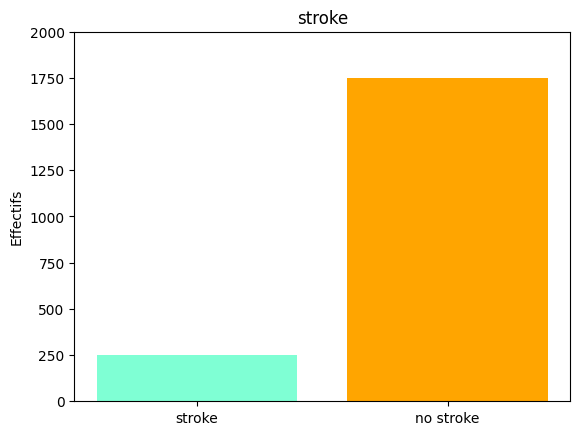

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary of value counts for the stroke_imbalance variable

stroke_imbalance = {'stroke': strock_count, 'no stroke': no_stroke_count}

# Convert the dictionary to arrays of keys and values
keys = np.array(list(stroke_imbalance.keys()))
values = np.array(list(stroke_imbalance.values()))

# Create a bar plot
plt.bar(keys, values, color=['aquamarine', 'orange'])
plt.title('stroke')
plt.ylabel('Effectifs')
plt.ylim(0, 2000)
plt.show()

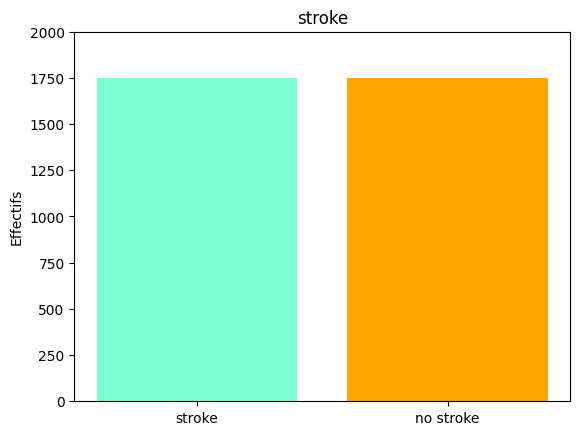

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary of value counts for the stroke_imbalance variable

stroke_balanced = {'stroke': stroke_balanced_count, 'no stroke': no_stroke_balanced_count}

# Convert the dictionary to arrays of keys and values
keys = np.array(list(stroke_balanced.keys()))
values = np.array(list(stroke_balanced.values()))

# Create a bar plot
plt.bar(keys, values, color=['aquamarine', 'orange'])
plt.title('stroke')
plt.ylabel('Effectifs')
plt.ylim(0, 2000)
plt.show()

C:\Users\rapo\AppData\Local\Temp\ipykernel_2724\2649265752.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data_balanced.age, hist=False)


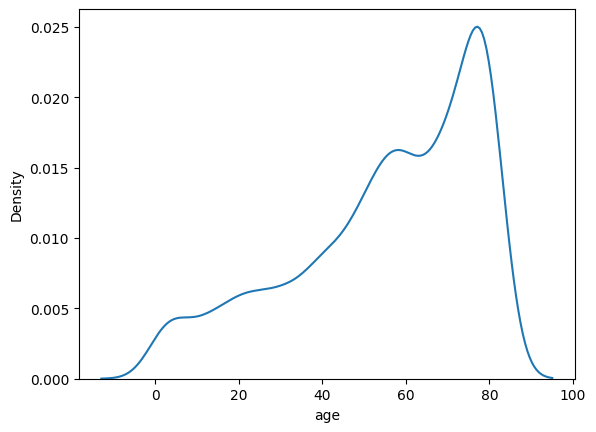

In [26]:
# plotting density plot for carat using distplot()
sns.distplot(a=data_balanced.age, hist=False)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

C:\Users\rapo\AppData\Local\Temp\ipykernel_2724\385100844.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data=data, x='age', hue='stroke_c', fill=True, alpha=0.2, bw=1)


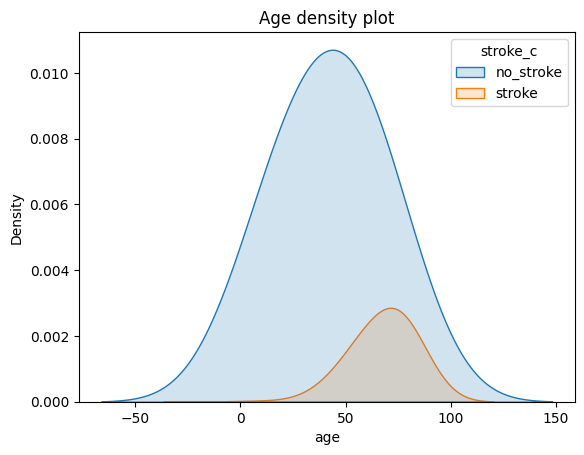

In [19]:
plt.figure()
sns.kdeplot(data=data, x='age', hue='stroke_c', fill=True, alpha=0.2, bw=1)
plt.title("Age density plot")
plt.show()


In [20]:
data["age"]

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
1994    22.0
1995    71.0
1996    32.0
1997    32.0
1998    63.0
Name: age, Length: 1999, dtype: float64

C:\Users\rapo\AppData\Local\Temp\ipykernel_2724\325752415.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data_balanced.avg_glucose_level, kde=False)


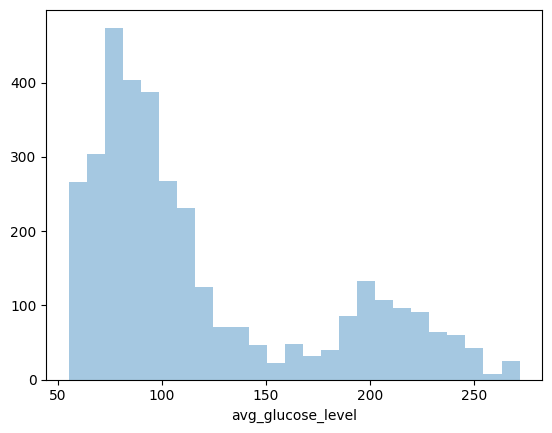

In [31]:
# plotting histogram for carat using distplot()
sns.distplot(a=data_balanced.avg_glucose_level, kde=False)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

In [25]:
df=pd.DataFrame(data_balanced)
df.to_csv("data_balanced.csv")

In [28]:
data_balanced["age"]

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
3495    71.0
3496    52.0
3497    69.0
3498    59.0
3499    79.0
Name: age, Length: 3500, dtype: float64

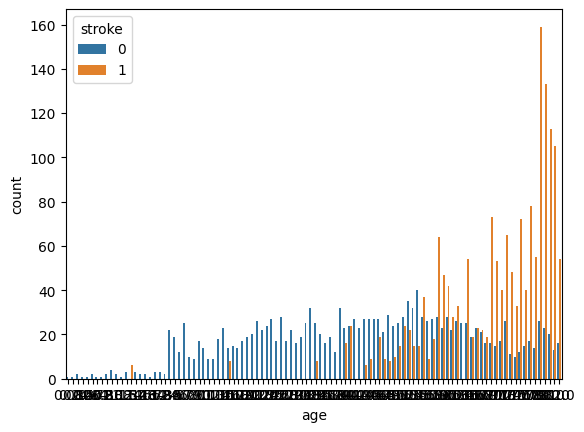

In [43]:
# importing the required library

import seaborn as sns
import matplotlib.pyplot as plt

# read a tips.csv file from seaborn library


# count plot on two categorical variable
sns.countplot(x ='age', hue = "stroke", data = data_balanced)

# Show the plot
plt.show()



NameError: name 'var' is not defined

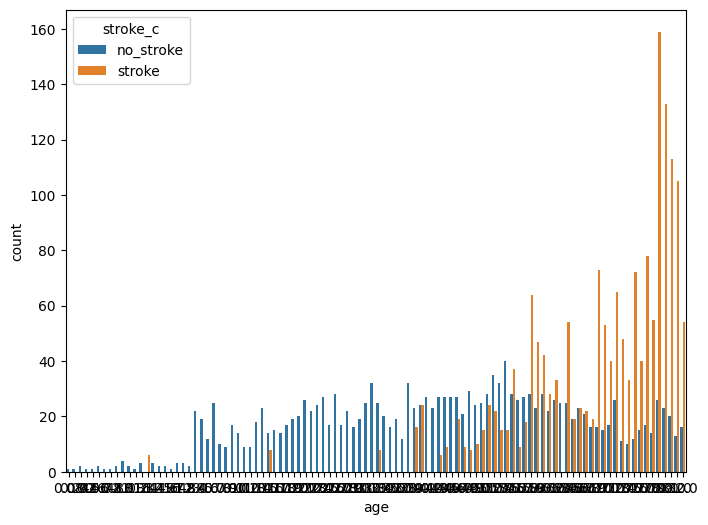

In [44]:

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the count plot
sns.countplot(x="age", hue="stroke_c", data=data_balanced)

    # Set the title and labels
plt.title("{} distribution".format(var))
plt.xlabel("age")
plt.ylabel("Count")
plt.legend(title="Stroke", loc="upper right")

    # Show the plot
plt.show()

In [51]:
summary_table = (data_balanced.groupby('hypertension')
                         .agg(total=('hypertension', 'count'),
percent=('hypertension', lambda x: round(len(x) / len(data_balanced), 3)),
strokes=('stroke_c', lambda x: sum(x == "stroke")),
stroke_percent=('stroke_c', lambda x: round(sum(x == "stroke") / len(x), 3))).reset_index())

summary_table


,hypertension,total,percent,strokes,stroke_percent
0,0,2852,0.815,1259,0.441
1,1,648,0.185,491,0.758


In [49]:
len(data_balanced)

3500

In [50]:
summary_table = data.groupby('hypertension').agg(
    total=('hypertension', 'count'),
)
summary_table

,total
hypertension,
0,1776
1,223


In [62]:
import plotly.express as px

fig = px.histogram(data_balanced, x='age', color='stroke_c', nbins=30,
                            opacity=0.5, marginal='violin',
                            title='Age Plot')
fig

In [63]:
fig2 = px.histogram(data_balanced, x='age', color='stroke_c',
                        nbins=30, opacity=0.5,
                        marginal='rug', barmode='overlay',
                        title='Age Bar Plot')
fig

In [64]:
fig = px.box(data_balanced, x="stroke_c", y="age", color="stroke_c",
                 title="Age box plot",
                 marginal="jitter")
fig

TypeError: box() got an unexpected keyword argument 'marginal'

In [67]:
fig = px.box(data_balanced, x='stroke_c', y='age', color='stroke_c', 
                 title='Age Box Plot', points='all')
fig


In [3]:
import pandas as pd
final_data = pd.read_csv('./data/data_balanced.csv')
final_data

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_interval,age_interval_c,stroke_c
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,"] 66 , 82 ]",Vieux,stroke
1,1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.230412,never smoked,1,"] 50 , 66 ]",Adultes,stroke
2,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,"] 66 , 82 ]",Vieux,stroke
3,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,"] 33 , 50 ]",Adultes,stroke
4,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,"] 66 , 82 ]",Vieux,stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,53401,Male,71.0,1,1,No,Govt_job,Rural,216.94,30.900000,never smoked,1,"] 66 , 82 ]",Vieux,stroke
3496,3496,19773,Female,52.0,0,0,Yes,Private,Rural,96.59,26.400000,never smoked,1,"] 50 , 66 ]",Adultes,stroke
3497,3497,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,"] 66 , 82 ]",Vieux,stroke
3498,3498,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,29.230412,Unknown,1,"] 50 , 66 ]",Adultes,stroke


In [4]:
final_data.dtypes

Unnamed: 0             int64
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
age_interval          object
age_interval_c        object
stroke_c              object
dtype: object

In [85]:
X = final_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
Y=final_data['stroke']

In [86]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2) # you can change the test size

X_train.shape, X_test.shape, y_train.shape, y_test.shape
#feature Scaling  
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

In [87]:
# 80% of data is being used for the test set 
X.shape[0] * 0.8

2800.0

In [88]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier  



from sklearn.metrics import accuracy_score ,f1_score, roc_auc_score, confusion_matrix,ConfusionMatrixDisplay


classifiers = [
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
   
    
    
]

In [103]:
  # loop over classifiers
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fsc=f1_score(y_test, y_pred, average='weighted')
    print('Accuracy: %.6f,f1_score: %.2f , Algorithm: %s' % (accuracy, fsc , classifier.__class__.__name__))
    #ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred);
    ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);
    

Accuracy: 0.785357,f1_score: 0.78 , Algorithm: SVC
Accuracy: 0.898571,f1_score: 0.90 , Algorithm: KNeighborsClassifier
Accuracy: 0.777500,f1_score: 0.78 , Algorithm: LogisticRegression
Accuracy: 1.000000,f1_score: 1.00 , Algorithm: RandomForestClassifier
Accuracy: 1.000000,f1_score: 1.00 , Algorithm: DecisionTreeClassifier


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=Y);

In [95]:
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
clf=KNeighborsClassifier()
clf.fit(X_train, y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)



In [98]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
clf=SVC(probability=True)
clf.fit(X_train, y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

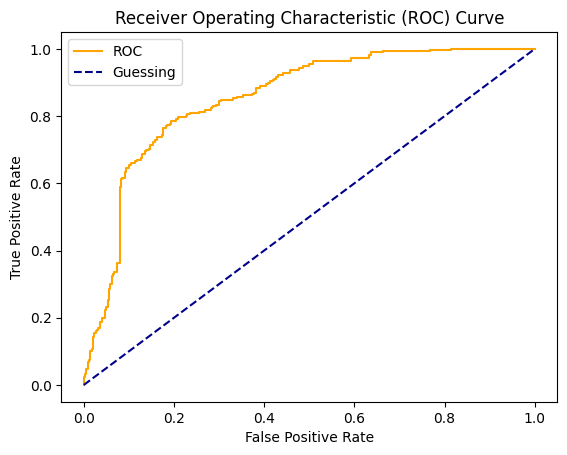

In [104]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)